In [1]:
import Results
import pandas as pd
import numpy as np

In [2]:
results = Results.results

In [3]:
df = pd.DataFrame(columns=['n_submodels', 'n_features', 'smooth', 'bootstrap', 'average_accuracy', 'standard_deviation'])

In [4]:
for row in results:
    temp_d = {
        'n_submodels': row[0][0],
        'n_features': row[0][1], 
        'smooth': row[0][2],
        'bootstrap': row[0][3],
        'average_accuracy': row[1][0],
        'standard_deviation': row[1][1]
    }
    df = df.append(temp_d, ignore_index=True)

In [43]:
df.index += 1

In [44]:
df.head()

,n_submodels,n_features,smooth,bootstrap,average_accuracy,standard_deviation
1,5,5,0.0,True,0.560879,0.164978
2,5,5,0.0,False,0.933593,0.041063
3,5,5,0.5,True,0.629270,0.129424
4,5,5,0.5,False,0.925443,0.030596
5,5,5,1.0,True,0.432105,0.127188


In [45]:
df.to_csv('results.csv')

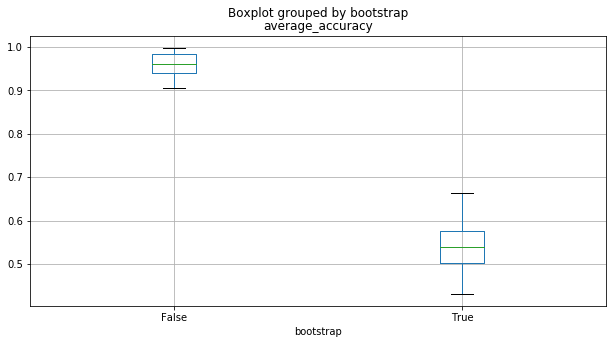

In [40]:
df.boxplot(column='average_accuracy', by='bootstrap', figsize=(10,5))

In [ ]:
from scipy import stats

In [19]:
grouping_vars = ['n_submodels', 'n_features', 'smooth', 'bootstrap']

In [31]:
i=3
grps = pd.unique(df[grouping_vars[i]].values)
d_data = {grp:df['average_accuracy'][df[grouping_vars[i]] == grp] for grp in grps}

In [32]:
stats.f_oneway(*[col for col in d_data.values()])

F_onewayResult(statistic=3697.2216656904952, pvalue=1.6102980461933047e-111)

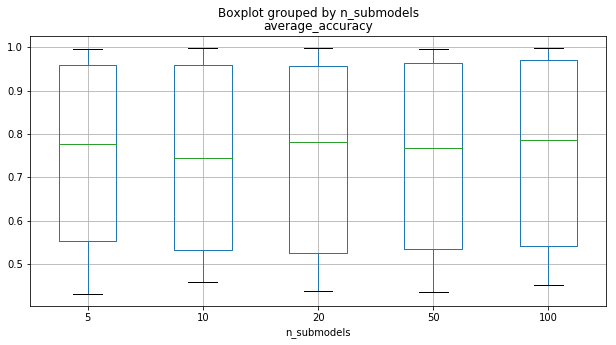

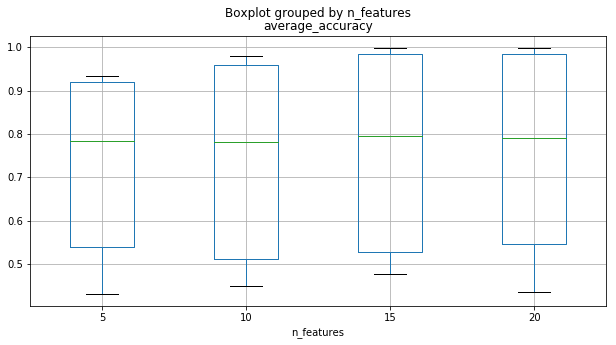

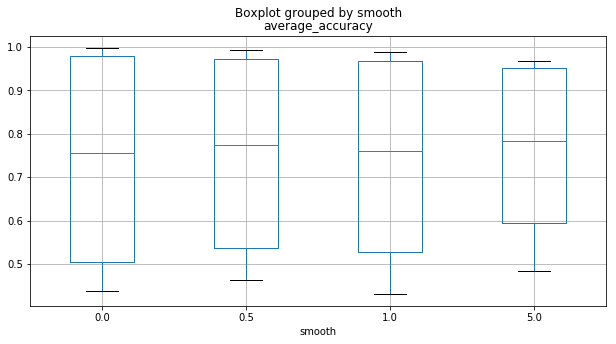

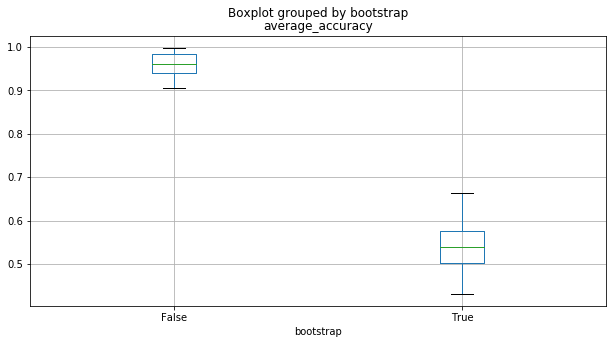

In [50]:
import matplotlib.pyplot as plt
for par in grouping_vars:
    df.boxplot(column='average_accuracy', by=par, figsize=(10,5))
    plt.savefig("boxplots/{}.png".format(par))

In [52]:
df.groupby('bootstrap').mean()

,smooth,average_accuracy,standard_deviation
bootstrap,,,
False,1.625,0.960015,0.016035
True,1.625,0.539376,0.140034


In [68]:
df.iloc[df['average_accuracy'].argmax()-1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


n_submodels                  100
n_features                    15
smooth                         0
bootstrap                  False
average_accuracy        0.997661
standard_deviation    0.00145417
Name: 146, dtype: object

In [70]:
df.average_accuracy.max()

0.9976612331679661

In [71]:
opt_vals = [100, 15, 0, False]

In [76]:
for i in range(len(opt_vals)):
    temp_list = list(range(4))
    temp_list.remove(i)
    temp_df = df.loc[
        (df[grouping_vars[temp_list[0]]] == opt_vals[temp_list[0]]) & \
        (df[grouping_vars[temp_list[1]]] == opt_vals[temp_list[1]]) & \
        (df[grouping_vars[temp_list[2]]] == opt_vals[temp_list[2]]) 
    ][[grouping_vars[i],'average_accuracy']]
    print(temp_df)
    print()

    n_submodels  average_accuracy
18            5          0.979589
50           10          0.997307
82           20          0.997307
114          50          0.996740
146         100          0.997661

    n_features  average_accuracy
130          5          0.931042
138         10          0.979447
146         15          0.997661
154         20          0.996315

     smooth  average_accuracy
146     0.0          0.997661
148     0.5          0.993692
150     1.0          0.988590
152     5.0          0.960666

    bootstrap  average_accuracy
145      True          0.478455
146     False          0.997661



In [82]:
list_n_submodels = [0.979589,0.997307,0.997307,0.996740,0.997661]
list_n_features = [0.931042,0.979447,0.997661,0.996315]
list_smooth = [0.997661,0.993692,0.988590,0.960666]
list_bootstrap = [0.478455,0.997661]

results_uber_list = [list_n_submodels, list_n_features, list_smooth, list_bootstrap]

In [83]:
n_submodels_vals = [5, 10, 20, 50, 100]
n_features_vals = [5, 10, 15, 20]
smooth_vals = [0.0, 0.5, 1.0, 5.0]
bootstrap_vals = [True, False]
vals_uber_list = [n_submodels_vals, n_features_vals, smooth_vals, bootstrap_vals]

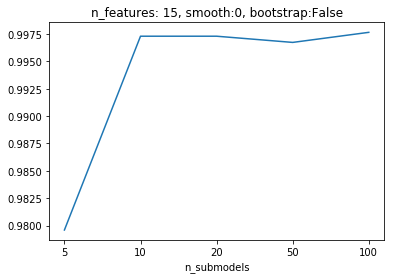

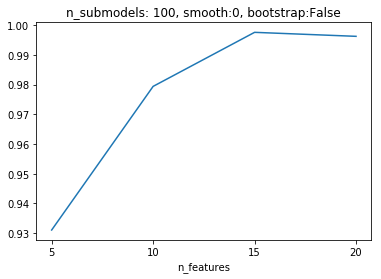

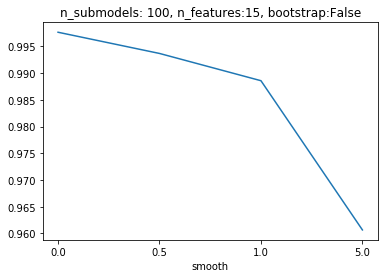

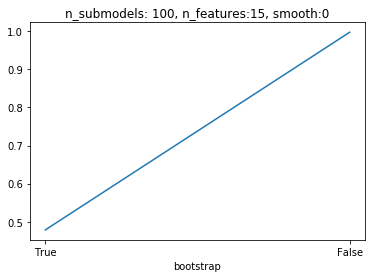

In [88]:
import matplotlib.pyplot as plt

for i in range(4):
    temp_list = list(range(4))
    temp_list.remove(i)
    textbox = "{}: {}, {}:{}, {}:{}".format(
        grouping_vars[temp_list[0]], opt_vals[temp_list[0]],
        grouping_vars[temp_list[1]], opt_vals[temp_list[1]],
        grouping_vars[temp_list[2]], opt_vals[temp_list[2]],
    )
    xs = list(range(1, len(results_uber_list[i])+1))
    plt.plot(xs, results_uber_list[i])
    plt.xticks(xs, vals_uber_list[i])
    plt.title(textbox)
    plt.xlabel(grouping_vars[i])
    plt.savefig('plots/{}_effect.png'.format(grouping_vars[i]))
    plt.show()